# Assignment 8

Dominic Heye Z1841746

# Part 1

In [3]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
df = pd.read_csv("http://faculty.cs.niu.edu/~dakoop/cs503-2021fa/a8/ny-county-energy.csv.gz")

In [5]:
df = df.query('data_field_display_name == "Total Consumption (T)"')


In [6]:
elec_df = df.query('data_class == "electricity"')
elec_df = elec_df.sort_values("value")
highest = elec_df.tail(1)

In [7]:
county_name = highest.iat[0,0]
year = highest.iat[0,1]
month = highest.iat[0,2]

In [8]:
print(f'The highest energy usage was found in:\nCounty = {county_name}\nYear =  {year}\nMonth = {month}')

The highest energy usage was found in:
County = Erie
Year =  2016
Month = 8


In [9]:
elec_df = elec_df.query('year == 2020')
grouped = elec_df.groupby('county_name')[['value', 'number_of_accounts']].sum()

In [10]:
grouped['per_account'] = grouped['value'] / grouped['number_of_accounts']
grouped = grouped.sort_values('per_account')

In [11]:
highest = grouped.tail(1)
county_name = highest.index[0]
year = 2020

print(f'The highest energy usage per account was found in:\nCounty = {county_name}\nYear =  {year}')

The highest energy usage per account was found in:
County = Niagara
Year =  2020


# Part 2

In [12]:
import matplotlib.pyplot as plt

In [13]:
data_year = df.groupby(['data_class', 'year'])['value'].sum()
elec_data = data_year['electricity']
gas_data = data_year['natural_gas']

Text(0.5, 1.0, 'Natural Gas')

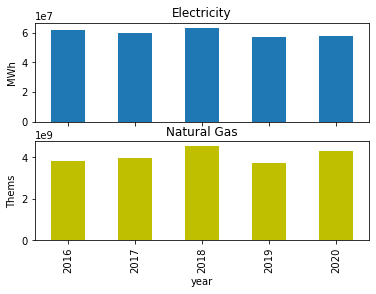

In [14]:
fig, ax = plt.subplots(2)
elec_data.plot(ax=ax[0], kind = 'bar', sharex = True, ylabel = 'MWh')
ax[0].set_title('Electricity')
gas_data.plot(ax = ax[1],kind = 'bar', ylabel = 'Thems', color = 'y')
ax[1].set_title('Natural Gas')

In [15]:
df = df.assign(day=lambda x: 1)
df = df.assign(date= pd.to_datetime(df[['year', 'month', 'day']]))

In [16]:
month_data = df.groupby(['data_class', 'date'])['value'].sum()
elec_data = month_data['electricity']
gas_data = month_data['natural_gas']

Text(0.5, 1.0, 'Natural Gas')

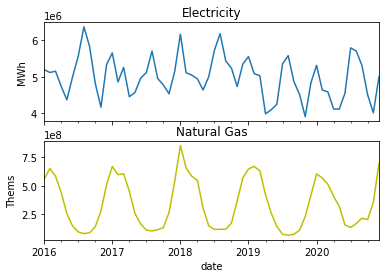

In [17]:
fig, ax = plt.subplots(2)
elec_data.plot(ax=ax[0], sharex = True, ylabel = 'MWh')
ax[0].set_title('Electricity')
gas_data.plot(ax = ax[1], ylabel = 'Thems', color = 'y')
ax[1].set_title('Natural Gas')